In [56]:
# Machine Learning 

In [57]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# output of a neuron
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] +inputs[2]*weights[2] + bias
output

2.3

In [59]:
# so if we had a network that has 3 inputs, 2 hidden layers with four neurons each and three outputs the example above my be from 
# a neuron in the first hidden layer recieving three inputs.

# lets model the output layer
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1, 
          inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2, 
          inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3]
print(output)

[4.8, 1.21, 2.385]


In [60]:
# vectorisation 

weights = [[0.2, 0.8, -0.5, 1.0], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

layer_outputs = []
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


In [61]:
# the weight changes the magnitude of the activation and the bias offsets it
# we can combine the inputs and weights using the dot product that results in a scalar single value.

# using one neurone...
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2
# weights has to come first!! doesn't matter at the moment but for sub-lists it will matter
output = np.dot(weights, inputs) + bias
output

4.8

In [62]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
# weights has to come first!! doesn't matter at the moment but for sub-lists it will matter
output = np.dot(weights, inputs) + biases
output

array([4.8  , 1.21 , 2.385])

In [63]:
## batches, we can calculate these things in parallel, thats why we run neural networks on GPUs because they have way more 
## 'cores' than the CPU.
## batch size refers then to the number of test cases you show the model for it to fit it. If you show one at a time thats slow, if you show a
## all the data at once that leads to overfitting.
## so lets increase the batch size

inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5], 
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
# weights has to come first!! doesn't matter at the moment but for sub-lists it will matter (not sure if this is right actually)
output = np.dot(weights, inputs) + biases

ValueError: shapes (3,4) and (3,4) not aligned: 4 (dim 1) != 3 (dim 0)

In [ ]:
# this trhows an error because although you want the dot product it is calculated when weights has same amount of rows as inputs 
# has columns. This is not the case so you have to transpose the weights matrix which is effectively turning it on its side
# transpose: first row of numbers becomes the first column. see below for how you do it in python

inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5], 
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

output = np.dot(inputs, np.array(weights).T) + biases
output

In [ ]:
## Now lets add another layer

inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5], 
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]


weights2 = [[0.1, -0.14, 0.5], 
           [-0.5, 0.12, -0.33], 
           [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer1_output = np.dot(inputs, np.array(weights).T) + biases # THis becomes the output of layer1

layer2_output = np.dot(layer1_output, np.array(weights2).T) + biases2 # THis becomes the output of layer2

layer2_output

In [ ]:
## Writing out each layer of weights etc is too inefficient and instead we are going to make an object.

## Now lets add another layer
## convention that 'X' means actual training dataset
np.random.seed(0)
X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
# first we want random weights between -1 and +1 so that inputs don't get bigger. in a smaller range is better, 
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons) # creates a matrix n_inputs(row) by N_neurons(columns) with random numbers from
                                                                # a gaussian distribution (normal) that is then scaled down by 0.1 so nothing is above 1
        self.biases = np.zeros((1, n_neurons)) # doesn't work if not in a tuple.
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(4, 5)
# Number of inputs here is the number of columns in inputs matrix
layer2 = Layer_Dense(5, 2)
#inputs has to be the same as num outputs from previous layer so 5 in this case

layer1.forward(X)
#print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)



In [ ]:
## introducing the step function, x > 0 y=1, x <= 0 y=0 if x is bigger than 0 then y is 1 else 0
## can be used as an activation function
## need non-linear activation functions to fit non_linear curves.
## simple example below

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
outputs = []

for i in inputs:
    if i > 0:
        output.append(i)
    elif i <= 0:
        output.append(0)

## or

for i in inputs:
    output.append(max(0, i))

In [ ]:
## Writing out each layer of weights etc is too inefficient and instead we are going to make an object.

## Now lets add another layer
## convention that 'X' means actual training dataset
np.random.seed(0)
X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
# first we want random weights between -1 and +1 so that inputs don't get bigger. in a smaller range is better, 
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons) # creates a matrix n_inputs(row) by N_neurons(columns) with random numbers from
                                                                # a gaussian distribution (normal) that is then scaled down by 0.1 so nothing is above 1
        self.biases = np.zeros((1, n_neurons)) # doesn't work if not in a tuple.
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    def forward(self, inputs):
        self.outputs = np.maximum(0, inputs)


layer1 = Layer_Dense(4, 5)
# Number of inputs here is the number of columns in inputs matrix
layer2 = Layer_Dense(5, 2)
#inputs has to be the same as num outputs from previous layer so 5 in this case

layer1.forward(X)
#print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)



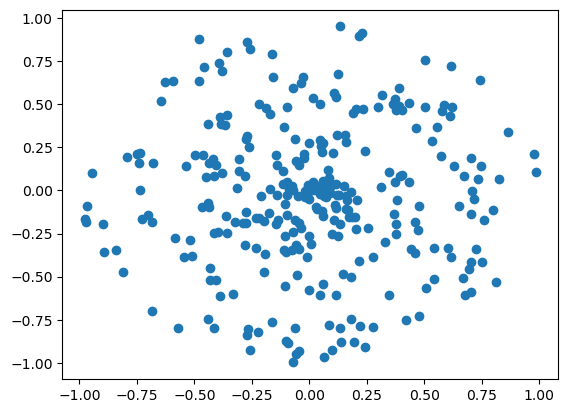

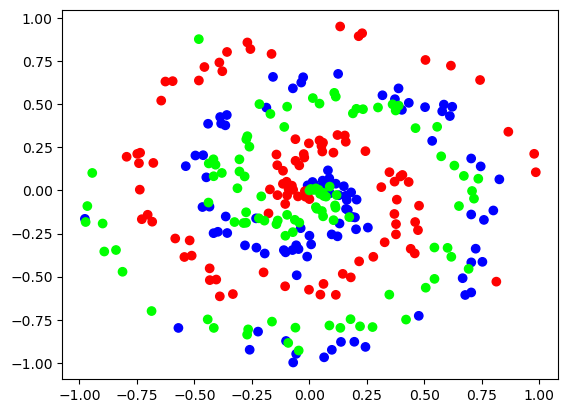

In [70]:
## just finding a sample data set: spiral data...
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X, y = spiral_data(100, 3)


plt.scatter(X[:,0], X[:,1])
plt.show()

plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()